In [1]:
import os

# Change the current working directory
os.chdir('/Users/payalteyung/Desktop/DA')

# Verify the change
print(os.getcwd())

/Users/payalteyung/Desktop/DA


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
%matplotlib inline

In [3]:
df = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

In [4]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [6]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Q. When reviewing the df.info() output, what do you notice about the different
variables? Are there any null values? Are all of the variables numeric? Does anything else stand
out?

When reviewing thr df.info() output, it gives us the data type ,total enteries of all the columns ,how many and what are the columns ,if the columns have name or not , if any columns are null or not.

No there are no null values and there is one object So, not all variables are numeric.

One thing that stands out is the unnamed column because since it is unnamed we dont have any idea about what it may be,or what may be the purpose of that column.

Q.When reviewing the df.describe() output, what do you notice about the distributions of each variable? Are there any questionable values?

When reviewing the df.describe() output, we can see that the count of all the columns is same so there are missing datas. The unnamed column has complex values for all the distributions.



In [7]:
df_sorted = df.sort_values(by='trip_distance',ascending=False)

In [8]:
df_sorted

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,63574825,1,07/26/2017 10:26:58 PM,07/26/2017 10:26:58 PM,1,0.00,1,N,162,264,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80
15916,47368116,1,06/29/2017 7:30:30 PM,06/29/2017 7:43:29 PM,1,0.00,1,N,79,148,3,8.50,1.0,0.5,0.00,0.00,0.3,10.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.00,1,N,193,193,1,2.50,0.0,0.5,0.66,0.00,0.3,3.96
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.00,1,N,145,145,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80


Q. Sort your first variable (trip_distance) from maximum to minimum value, do the values seem normal?

   The values donot seem to be normal as some on the trips have trip distance 0 even though there is pick up time and drop off time

In [9]:
df_sorted_total = df.sort_values(by='total_amount',ascending=False)
df_sorted_total.head(20) # top 20 nikaleko



,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [10]:
bottom_20 = df.sort_values(by="total_amount").head(20)  

In [11]:
bottom_20

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.00,0.0,0.0,0.0,0.0,-0.3,-120.30
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.50,-0.5,-0.5,0.0,0.0,-0.3,-5.80
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.00,-1.0,-0.5,0.0,0.0,-0.3,-5.80
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.50,0.0,-0.5,0.0,0.0,-0.3,-5.30
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.00,-0.5,-0.5,0.0,0.0,-0.3,-5.30
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.50,-0.5,-0.5,0.0,0.0,-0.3,-4.80
20317,75926915,2,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,1,0.24,1,N,116,116,4,-3.50,-0.5,-0.5,0.0,0.0,-0.3,-4.80
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.50,-1.0,-0.5,0.0,0.0,-0.3,-4.30
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.50,0.0,-0.5,0.0,0.0,-0.3,-4.30
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.00,-0.5,-0.5,0.0,0.0,-0.3,-4.30


In [12]:
# How many of each payment type are represented in the data?

payment_counts = df["payment_type"].value_counts().sort_index()  #each payment ko lagi

payment_type_labels = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute",
    5: "Unknown",
    6: "Voided trip"
}

for payment_type, count in payment_counts.items():
    print(f"{payment_type_labels[payment_type]}: {count}")  #total count ko lagi loop use gareko

Credit card: 15265
Cash: 7267
No charge: 121
Dispute: 46


In [13]:
credit_card_df = df[df["payment_type"] == 1]


In [14]:
if not credit_card_df.empty: 
    average_tip = credit_card_df["tip_amount"].mean()
    print(f"Average tip for credit card payments: {average_tip:.2f}")
else:
    print("No credit card payments found.")

Average tip for credit card payments: 2.73


Here, to find the average tip amount for trips paid for with credit card , first we have filtered the data to extarct data or tips paid with credit card . Then using if else statement we get the average tip amount.

We can see that the average tip for credit card payment is 2.73


In [15]:
cash_df = df[df["payment_type"] == 2]

In [16]:
if not cash_df.empty:
    average_tip =  cash_df["tip_amount"].mean()
    print(f"Average tip for cash payments : {average_tip:.2f}")
else:
    print("No cash payments found.")

Average tip for cash payments : 0.00


In [17]:
vendor_counts = df["VendorID"].value_counts().sort_index() #each vendor id ko occurence count gareko 

In [18]:
for VendorID, count in vendor_counts.items():
    print(f"Vendor ID {VendorID}: {count}")  #total count of each vendor id 

Vendor ID 1: 10073
Vendor ID 2: 12626


Here to find the times each vendor id represented in data , we have first sorted the data to count the occurence of each vendor id. Then we have used the for loop to count total of each vendor id.

In [19]:
mean_amounts = df.groupby("VendorID")["total_amount"].mean()  # vendors in group gareko and total mean amount for each vendor id nikaleko

In [20]:
for vendor_id, mean_amount in mean_amounts.items():
    print(f"Vendor ID {vendor_id}: Mean Total Amount = {mean_amount:.2f}")

Vendor ID 1: Mean Total Amount = 16.30
Vendor ID 2: Mean Total Amount = 16.32


In [21]:
credit_card_payments_df = df[df["payment_type"] == 1]


In [22]:
print(credit_card_payments_df)

       Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0        24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1        35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3        38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
5        23345809         2   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
...           ...       ...                     ...                     ...   
22692    60425673         1   07/16/2017 3:22:51 AM   07/16/2017 3:40:52 AM   
22693    67858616         2  08/10/2017 10:20:04 PM  08/10/2017 10:29:31 PM   
22695    66632549         2   08/06/2017 4:43:59 PM   08/06/2017 5:24:47 PM   
22697    60217333         2  07/15/2017 12:56:30 PM   07/15/2017 1:08:26 PM   
22698    17208911         1   03/02/2017 1:02:49 PM   03/02/2017 1:16:09 PM   

       passenger_count  trip_distance  RatecodeID s

In [23]:
credit_card_payments_df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.00,0.3,12.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22692,60425673,1,07/16/2017 3:22:51 AM,07/16/2017 3:40:52 AM,1,5.70,1,N,249,17,1,19.0,0.5,0.5,4.05,0.00,0.3,24.35
22693,67858616,2,08/10/2017 10:20:04 PM,08/10/2017 10:29:31 PM,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.00,0.3,10.56
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [24]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.float_format')

In [25]:
print(credit_card_payments_df)

       Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0        24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1        35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3        38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
5        23345809         2   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
...           ...       ...                     ...                     ...   
22692    60425673         1   07/16/2017 3:22:51 AM   07/16/2017 3:40:52 AM   
22693    67858616         2  08/10/2017 10:20:04 PM  08/10/2017 10:29:31 PM   
22695    66632549         2   08/06/2017 4:43:59 PM   08/06/2017 5:24:47 PM   
22697    60217333         2  07/15/2017 12:56:30 PM   07/15/2017 1:08:26 PM   
22698    17208911         1   03/02/2017 1:02:49 PM   03/02/2017 1:16:09 PM   

       passenger_count  trip_distance  RatecodeID s

In [26]:
filtered_data = credit_card_payments_df[['passenger_count']]

In [27]:
print(filtered_data)

       passenger_count
0                    6
1                    1
2                    1
3                    1
5                    6
...                ...
22692                1
22693                1
22695                1
22697                1
22698                1

[15265 rows x 1 columns]


Here we have first filtered the data for credit card payments only and then we have filtered the data for passenger count for credit card payments

In [28]:
average_tip_per_passenger_count = credit_card_payments_df.groupby('passenger_count')['tip_amount'].mean().reset_index()

#we have grouped by passenger count and the average group tip amount is calculated

In [29]:
print(average_tip_per_passenger_count)

   passenger_count  tip_amount
0                0    2.610370
1                1    2.714681
2                2    2.829949
3                3    2.726800
4                4    2.607753
5                5    2.762645
6                6    2.643326


In [30]:
average_tip_per_passenger_count.columns = ['Passenger Count', 'Average Tip Amount']

In [31]:
print(average_tip_per_passenger_count)

   Passenger Count  Average Tip Amount
0                0            2.610370
1                1            2.714681
2                2            2.829949
3                3            2.726800
4                4            2.607753
5                5            2.762645
6                6            2.643326


Here we have calculated the average tip amount according the passenger count.

# Data Visualization

Q. What methods are best for identifying outliers?


1. Visual Methods
a. Box Plot

    Description: A graphical representation of the distribution of a dataset that shows the median, quartiles, and potential outliers.
    Usage: Provides a quick visual check for outliers.

b. Scatter Plot

    Description: Plots individual data points to identify patterns and potential outliers.
    Usage: Useful for detecting outliers in two-dimensional data.

c. Histogram

    Description: Displays the distribution of a dataset.
    Usage: Can help identify unusual data points or skewness.

2. Machine Learning Methods
a. Isolation Forest

    Description: An algorithm specifically designed for anomaly detection by isolating observations.
    Usage: Effective for high-dimensional datasets.

b. Local Outlier Factor (LOF)

    Description: Measures the local density deviation of a data point with respect to its neighbors.
    Usage: Useful for detecting outliers in data with varying density.

c. One-Class SVM

    Description: A type of Support Vector Machine that is trained to recognize the distribution of the majority class and identify anomalies.
    Usage: Suitable for cases where the majority class is well-defined.

Q.How do you make the decision to keep or exclude outliers from any future models?

    1.Plot the feature and identify outliers.
    2.Assess how removing these outliers impacts the model’s performance.
    3.Decide to either remove them if they are errors or use a robust regression technique if they are valid extreme values.
    4.Validate the new model and compare its performance with the model that included outliers.


Q. Select data visualization types that will help you understand and explain the data.
Now that you know which data columns you’ll use, it is time to decide which data visualization
makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be
most helpful?
• Line graph
• Bar chart
• Box plot
• Histogram
• Heat map
• Scatter plot
• A geographic map



If we need to choose just one data visualization type for the TLC dataset to get a broad understanding of the data, a box plot would be a better choice because of the following reasons:

1.It shows the range of taxi fares and helps identify if there are any very high or very low fares that might be unusual.

2. It can illustrate the spread of trip durations, making it easier to see if some trips are unusually long or short.

3.If you have multiple categories (like different pickup locations or payment types), a box plot can help compare how fares or trip distances differ between these categories.

In [32]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

#datetime ma convert gareko

In [33]:
print(df.dtypes)

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object


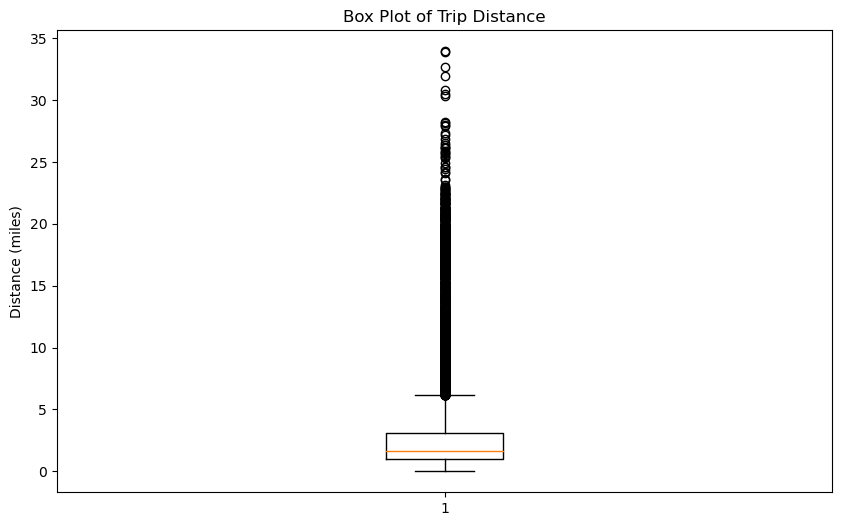

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.ylabel('Distance (miles)')
plt.show()

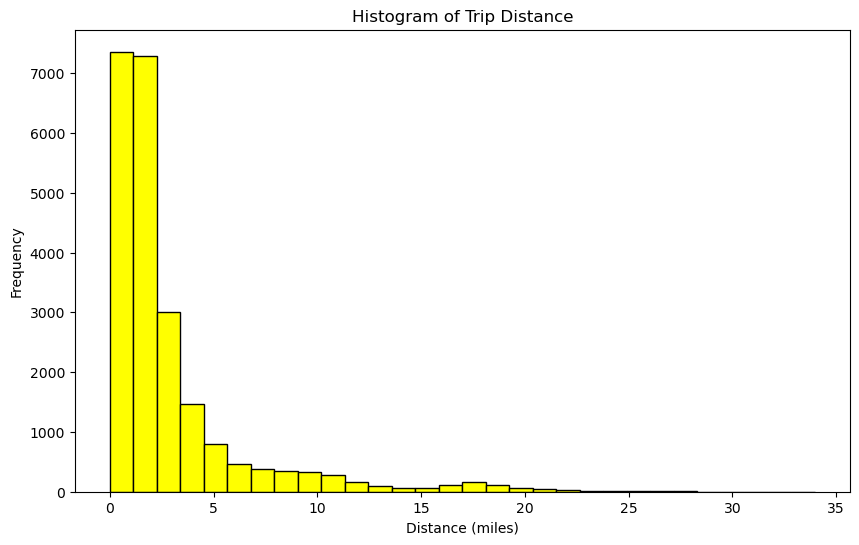

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(df['trip_distance'], bins=30, color='yellow', edgecolor='black')
plt.title('Histogram of Trip Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

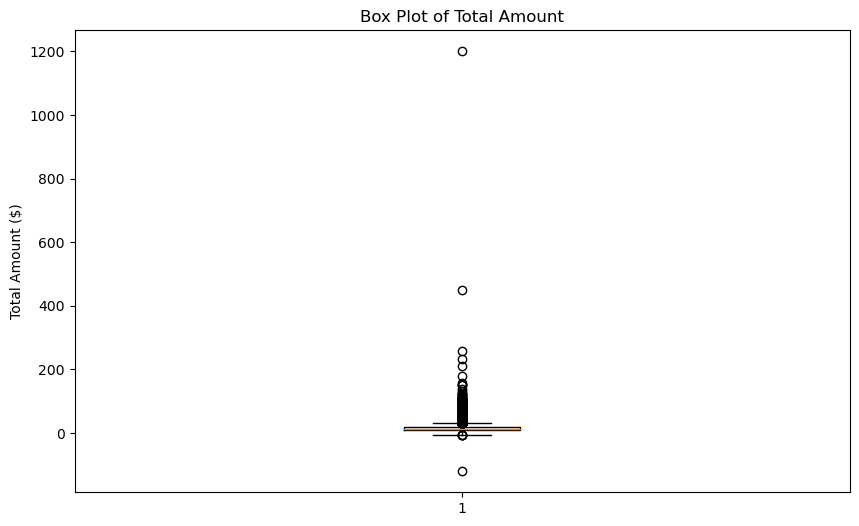

In [38]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['total_amount'])
plt.title('Box Plot of Total Amount')
plt.ylabel('Total Amount ($)')
plt.show()

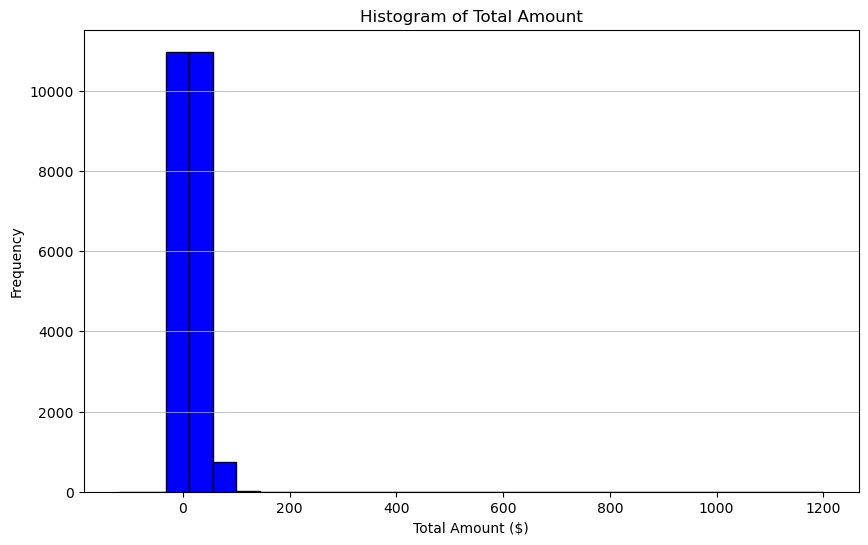

In [41]:
plt.figure(figsize=(10, 6))  
plt.hist(df['total_amount'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  
plt.show()

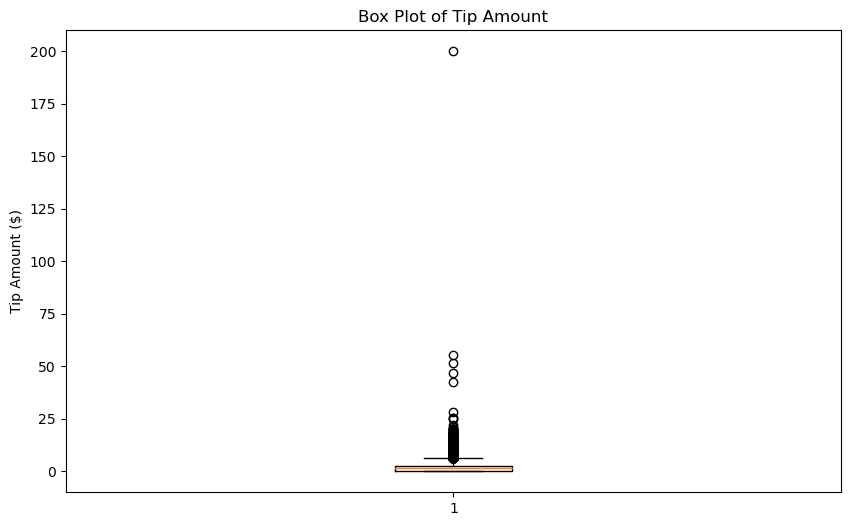

In [44]:
plt.figure(figsize=(10, 6))  
plt.boxplot(df['tip_amount'])
plt.title('Box Plot of Tip Amount')
plt.ylabel('Tip Amount ($)')
plt.show()


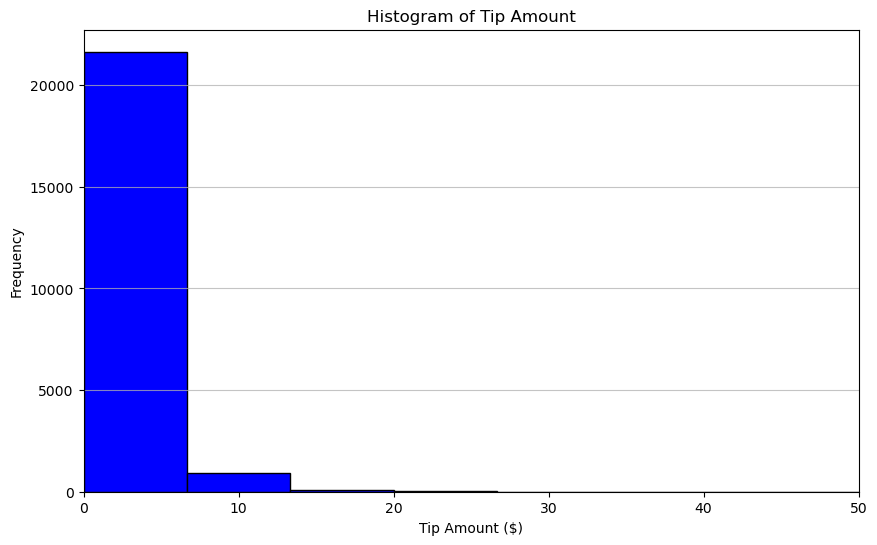

In [47]:
plt.figure(figsize=(10, 6))  
plt.hist(df['tip_amount'], bins=30, color='blue', edgecolor='black')
plt.xlim(0, 50) 
plt.title('Histogram of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)  
plt.show()

In [56]:
vendor1_data = df[df['VendorID'] == 1]
vendor2_data = df[df['VendorID'] == 2]

#filter data by vendor id

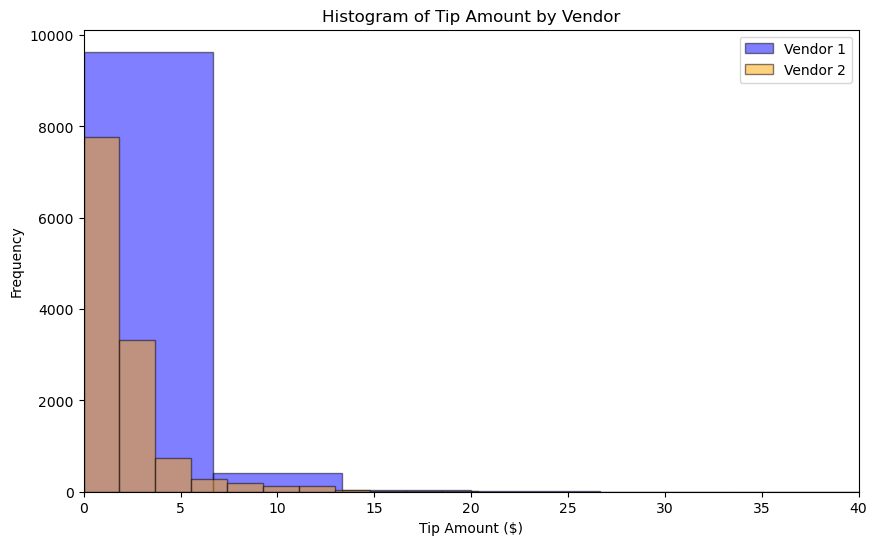

In [57]:
plt.figure(figsize=(10, 6))
plt.hist(vendor1_data['tip_amount'], bins=30, alpha=0.5, label='Vendor 1', color='blue', edgecolor='black')
plt.hist(vendor2_data['tip_amount'], bins=30, alpha=0.5, label='Vendor 2', color='orange', edgecolor='black')
plt.xlim(0,40)
plt.title('Histogram of Tip Amount by Vendor')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [52]:
df_filtered = df[df['tip_amount'] > 10]

In [53]:
vendor1_data = df_filtered[df_filtered['VendorID'] == 1]
vendor2_data = df_filtered[df_filtered['VendorID'] == 2]

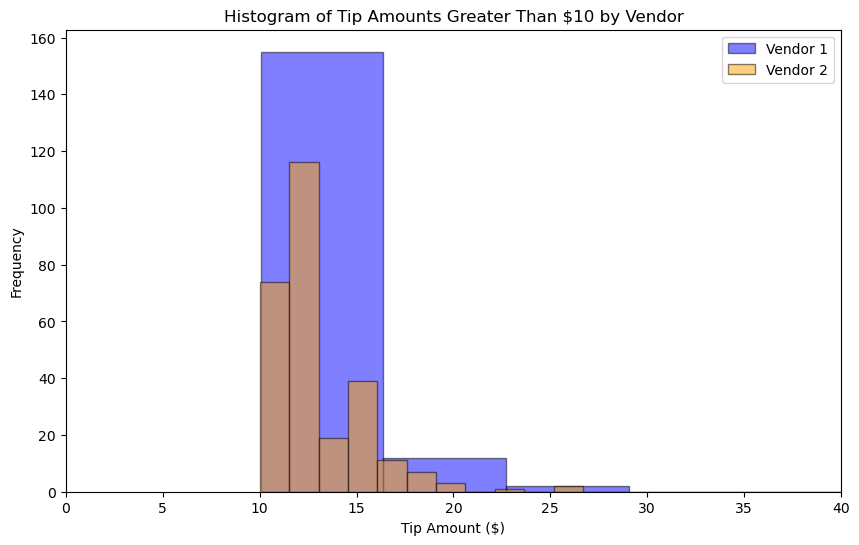

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(vendor1_data['tip_amount'], bins=30, alpha=0.5, label='Vendor 1', color='blue', edgecolor='black')
plt.hist(vendor2_data['tip_amount'], bins=30, alpha=0.5, label='Vendor 2', color='orange', edgecolor='black')
plt.xlim(0,40)
plt.title('Histogram of Tip Amounts Greater Than $10 by Vendor')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [58]:
unique_passenger_counts = df['passenger_count'].unique()
print(unique_passenger_counts)

[6 1 2 4 5 3 0]


In [59]:
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean()
print(mean_tips_by_passenger_count)

passenger_count
0    2.135758
1    1.848920
2    1.856378
3    1.716768
4    1.530264
5    1.873185
6    1.720260
Name: tip_amount, dtype: float64


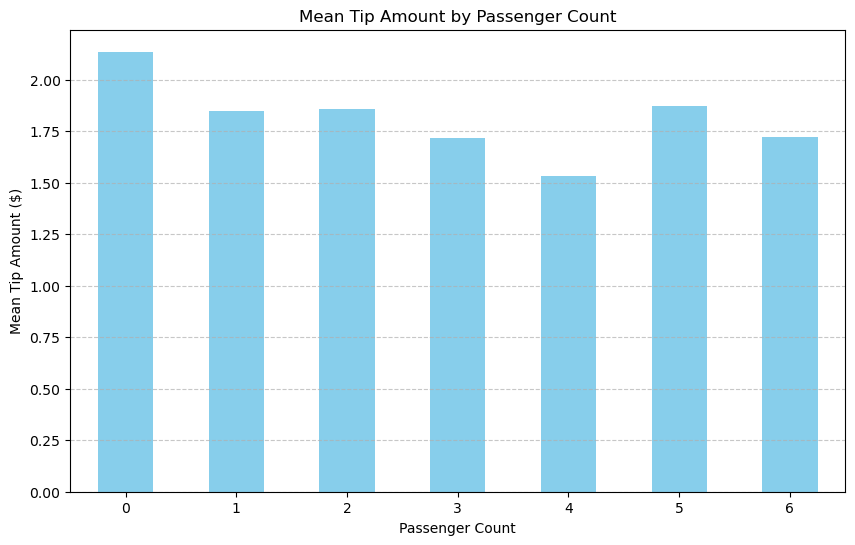

In [60]:
plt.figure(figsize=(10, 6))
mean_tips_by_passenger_count.plot(kind='bar', color='skyblue')
plt.title('Mean Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount ($)')
plt.xticks(rotation=0)  # Keep x labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [81]:
df['date'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['month'] = df['date'].dt.month_name()   # month column create gareko

In [82]:
print(df)

       Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1        35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2       106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3        38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4        30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   
...           ...       ...                  ...                   ...   
22694    14873857         2  2017-02-24 17:37:23   2017-02-24 17:40:39   
22695    66632549         2  2017-08-06 16:43:59   2017-08-06 17:24:47   
22696    74239933         2  2017-09-04 14:54:14   2017-09-04 14:58:22   
22697    60217333         2  2017-07-15 12:56:30   2017-07-15 13:08:26   
22698    17208911         1  2017-03-02 13:02:49   2017-03-02 13:16:09   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    6           3.34  

In [84]:
df['date'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day'] = df['date'].dt.day_name() 
print(df)#day column create gareko

       Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        24870114         2  2017-03-25 08:55:43   2017-03-25 09:09:47   
1        35634249         1  2017-04-11 14:53:28   2017-04-11 15:19:58   
2       106203690         1  2017-12-15 07:26:56   2017-12-15 07:34:08   
3        38942136         2  2017-05-07 13:17:59   2017-05-07 13:48:14   
4        30841670         2  2017-04-15 23:32:20   2017-04-15 23:49:03   
...           ...       ...                  ...                   ...   
22694    14873857         2  2017-02-24 17:37:23   2017-02-24 17:40:39   
22695    66632549         2  2017-08-06 16:43:59   2017-08-06 17:24:47   
22696    74239933         2  2017-09-04 14:54:14   2017-09-04 14:58:22   
22697    60217333         2  2017-07-15 12:56:30   2017-07-15 13:08:26   
22698    17208911         1  2017-03-02 13:02:49   2017-03-02 13:16:09   

       passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                    6           3.34  

Plot total ride count by month

In [107]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 
    'June', 'July', 'August', 'September', 'October', 
    'November', 'December'
]
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
df_sorted = df.sort_values('month').reset_index(drop=True)
    

In [93]:
    total_rides_per_month = df.groupby('month').size()
    

In [94]:
print(total_rides_per_month)

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
dtype: int64


In [95]:
print("Index (Months):", total_rides_per_month.index.tolist())
print("Values (Total Rides):", total_rides_per_month.values.tolist())

Index (Months): ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
Values (Total Rides): [1997, 1769, 2049, 2019, 2013, 1964, 1697, 1724, 1734, 2027, 1843, 1863]


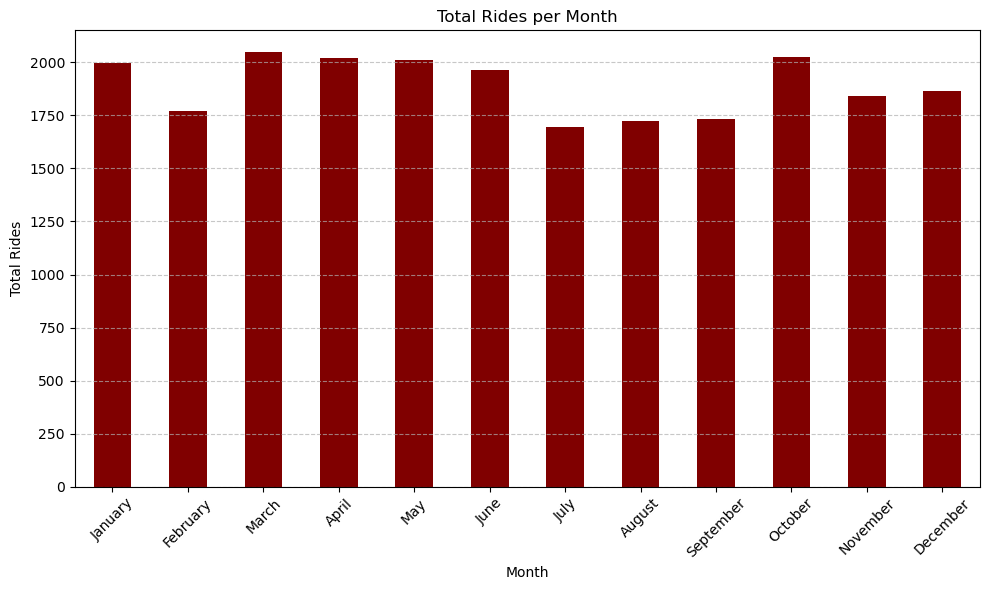

In [97]:
#barplot for total rides per month
plt.figure(figsize=(10, 6))
total_rides_per_month.plot(kind='bar', color='maroon')
plt.title('Total Rides per Month')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(ticks=range(len(total_rides_per_month)), labels=[f'{i}' for i in total_rides_per_month.index], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Plot total ride count by day

In [111]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)
df_sorted = df.sort_values('day').reset_index(drop=True)
total_rides_per_day = df.groupby('day').size()
print(total_rides_per_day)

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
dtype: int64


In [99]:
total_rides_per_day = total_rides_per_day.sort_index()

In [100]:
print(total_rides_per_day)

day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
dtype: int64


In [101]:
print("Index (Days):", total_rides_per_day.index.tolist())
print("Values (Total Rides):", total_rides_per_day.values.tolist())

Index (Days): ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Values (Total Rides): [2931, 3198, 3390, 3402, 3413, 3367, 2998]


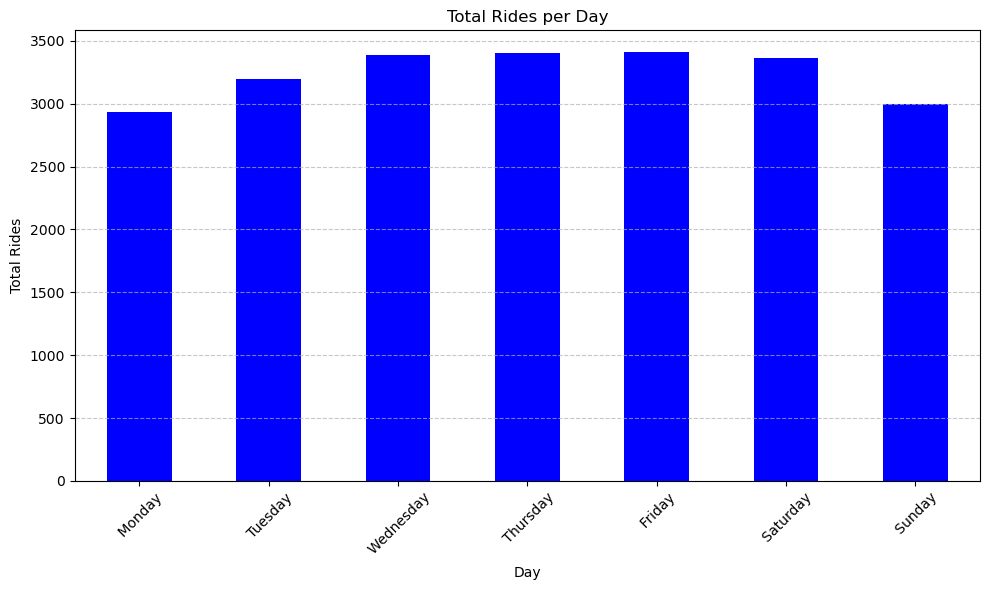

In [103]:
#barplot for total rides per day
plt.figure(figsize=(10, 6))
total_rides_per_day.plot(kind='bar', color='blue')
plt.title('Total Rides per Day')
plt.xlabel('Day')
plt.ylabel('Total Rides')
plt.xticks(ticks=range(len(total_rides_per_day)), labels=[f' {i}' for i in total_rides_per_day.index], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [104]:
total_revenue_per_day = df.groupby('day')['total_amount'].sum()
print(total_revenue_per_day)

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64


In [120]:

total_revenue_per_day = total_revenue_per_day.reindex(day_order)
print(total_revenue_per_day)

day
Monday       49574.37
Tuesday      52527.14
Wednesday    55310.47
Thursday     57181.91
Friday       55818.74
Saturday     51195.40
Sunday       48624.06
Name: total_amount, dtype: float64


In [115]:
print(df_sorted.head())

   Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0    93999461         1  2017-11-06 17:43:09   2017-11-06 17:59:14   
1    89344546         2  2017-10-23 09:33:05   2017-10-23 09:36:46   
2    66920258         1  2017-08-07 18:24:48   2017-08-07 18:34:08   
3    74334753         2  2017-09-04 22:29:31   2017-09-04 22:32:50   
4    49720656         2  2017-06-12 15:10:41   2017-06-12 15:42:15   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                1           1.50           1                  N   
1                2           0.44           1                  N   
2                1           1.00           1                  N   
3                1           0.60           1                  N   
4                4           3.85           1                  N   

   PULocationID  DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
0           161           142  ...         11.0    1.0      0.5        2.56   
1           

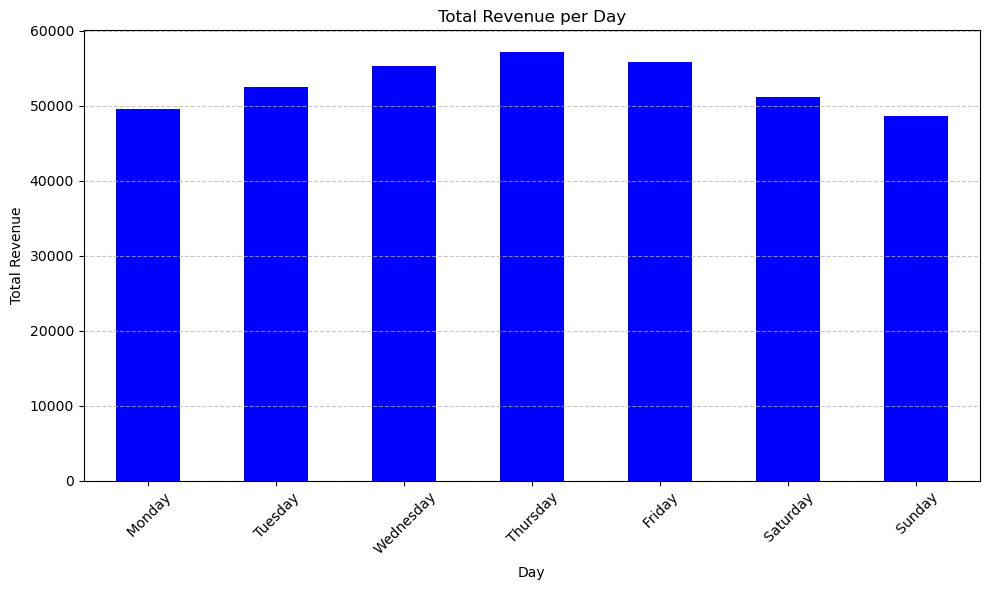

In [129]:
plt.figure(figsize=(10, 6))
total_revenue_per_day.plot(kind='bar', color='blue')
plt.title('Total Revenue per Day')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(len(total_revenue_per_day)), labels=[f' {i}' for i in total_revenue_per_day.index], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [121]:
total_revenue_per_month = df.groupby('month')['total_amount'].sum()
print(total_revenue_per_month)

month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64


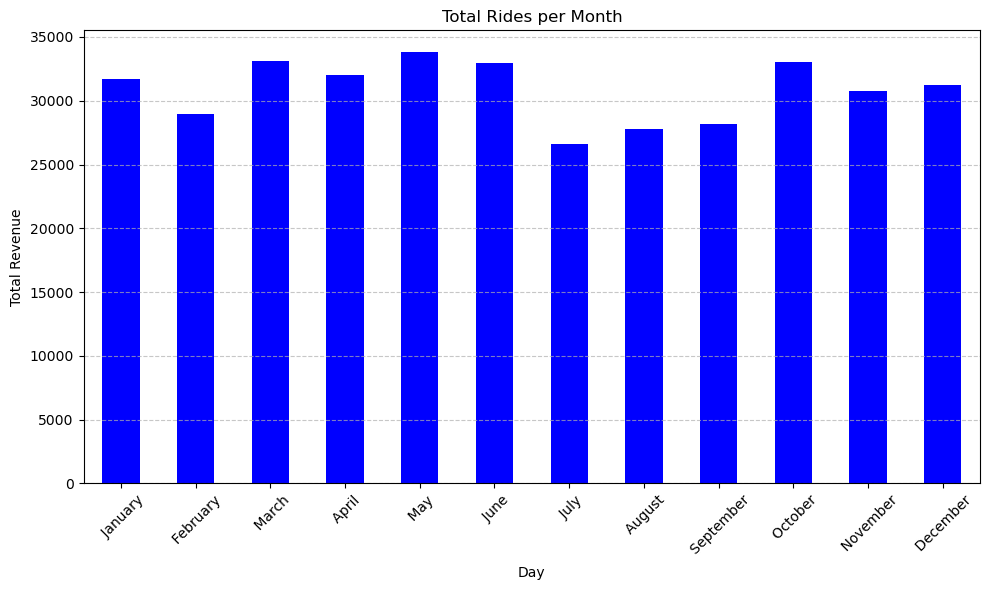

In [128]:
plt.figure(figsize=(10, 6))
total_revenue_per_month.plot(kind='bar', color='blue')
plt.title('Total Rides per Month')
plt.xlabel('Day')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(len(total_revenue_per_month)), labels=[f' {i}' for i in total_revenue_per_month.index], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [130]:
unique_dropoff_count = df['DOLocationID'].nunique()

print(f"Number of unique drop-off location IDs: {unique_dropoff_count}")

Number of unique drop-off location IDs: 216


In [132]:
mean_trip_distance_by_droplocation = df.groupby('DOLocationID')['trip_distance'].mean()
print(mean_trip_distance_by_droplocation)

DOLocationID
1      17.027353
4       2.436634
7       3.964944
9       9.305000
10      3.750000
         ...    
261     4.935897
262     2.866897
263     2.501951
264     2.928783
265    11.039000
Name: trip_distance, Length: 216, dtype: float64


In [133]:
mean_trip_distance_df = mean_trip_distance_by_droplocation.reset_index()
mean_trip_distance_df.columns = ['DOLocationID', 'MeanTripDistance']
print(mean_trip_distance_df)

     DOLocationID  MeanTripDistance
0               1         17.027353
1               4          2.436634
2               7          3.964944
3               9          9.305000
4              10          3.750000
..            ...               ...
211           261          4.935897
212           262          2.866897
213           263          2.501951
214           264          2.928783
215           265         11.039000

[216 rows x 2 columns]


In [134]:
sorted_mean_trip_distance = mean_trip_distance_by_droplocation.sort_values(ascending=False)
print(sorted_mean_trip_distance)

DOLocationID
23     24.275000
29     21.650000
210    20.500000
11     17.945000
51     17.310000
         ...    
137     1.818852
234     1.727806
237     1.555494
193     1.390556
207     1.200000
Name: trip_distance, Length: 216, dtype: float64


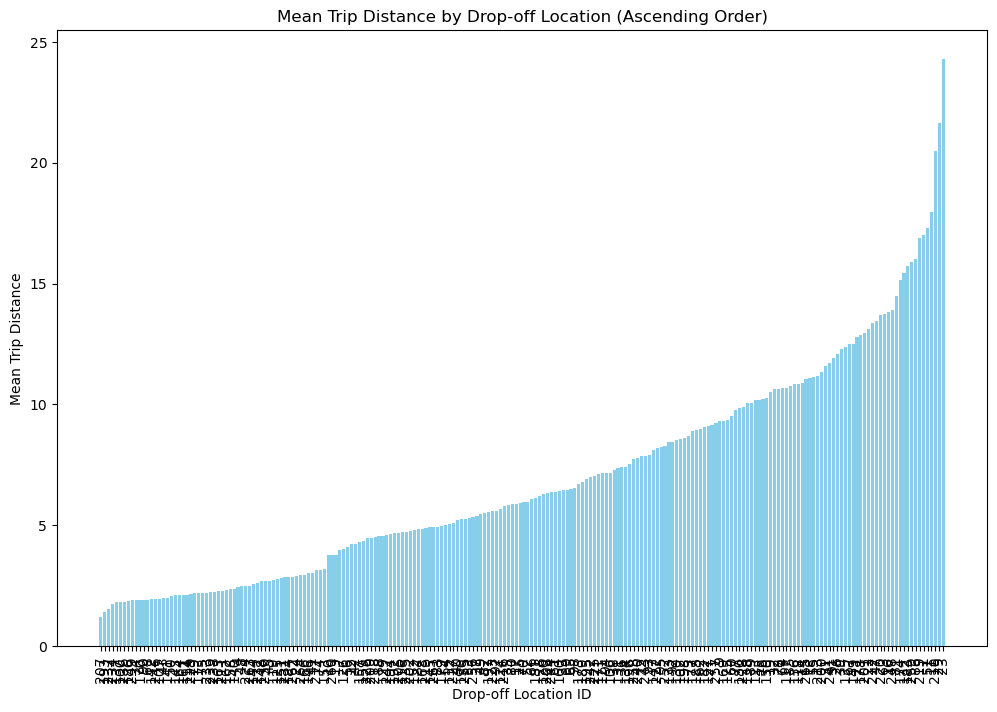

In [144]:
mean_trip_distance_df = df.groupby('DOLocationID')['trip_distance'].mean().reset_index()
mean_trip_distance_df.columns = ['DOLocationID', 'MeanTripDistance']


sorted_mean_trip_distance_df = mean_trip_distance_df.sort_values(by='MeanTripDistance', ascending=True)


plt.figure(figsize=(12, 8))
plt.bar(sorted_mean_trip_distance_df['DOLocationID'].astype(str), sorted_mean_trip_distance_df['MeanTripDistance'], color='skyblue')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Mean Trip Distance')
plt.title('Mean Trip Distance by Drop-off Location (Ascending Order)')
plt.xticks(rotation=90)  
plt.show()

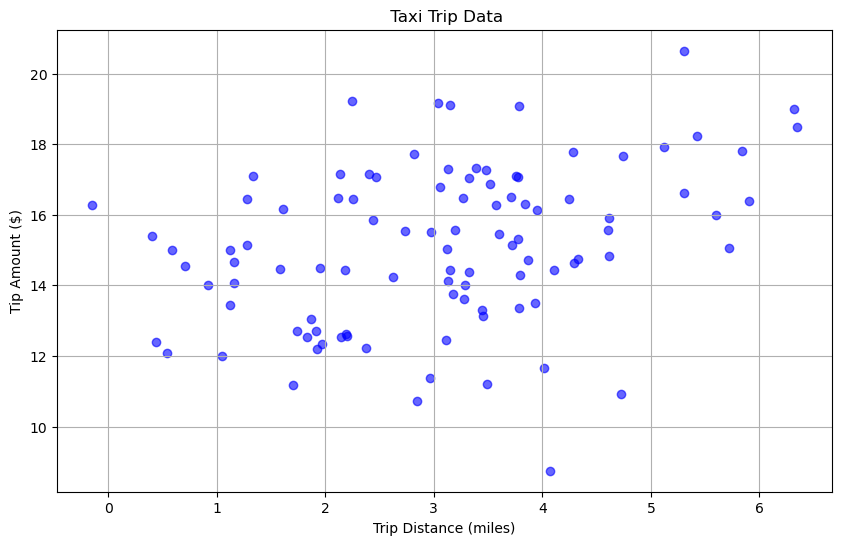

In [146]:
#extra content
mean = [3, 15] 
cov = [[2, 1], [1, 5]]  
num_points = 100

points = np.random.multivariate_normal(mean, cov, num_points)

trip_distance, tip_amount = points[:, 0], points[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(trip_distance, tip_amount, alpha=0.6, color='blue')
plt.title(' Taxi Trip Data')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.show()

In [147]:
half = num_points // 2
points_first_half = points[:half]
points_second_half = points[half:]

In [148]:
def calculate_euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [149]:
distances = []
for point1 in points_first_half:
    for point2 in points_second_half:
        distance = calculate_euclidean_distance(point1, point2)
        distances.append(distance)
distances = np.array(distances)

print("Number of distances computed:", len(distances))
print("First few distances:", distances[:10]) 

Number of distances computed: 2500
First few distances: [2.71639943 3.34017006 4.29603534 3.28572419 2.34419318 1.51518228
 3.62756438 2.86626517 4.34158536 2.74453809]


In [156]:
unique_dolocations = df['DOLocationID'].unique()
sorted_dolocations = sorted(unique_dolocations)
consecutive = list(range(min(sorted_dolocations), max(sorted_dolocations) + 1)) == sorted_dolocations

if consecutive:
    print("All drop-off locations are consecutively numbered.")
else:
    print("Drop-off locations are not consecutively numbered.")

Drop-off locations are not consecutively numbered.


In [159]:
df_sorted = df.sort_values(by='DOLocationID')
print(df_sorted.head(20))

       Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
10444   110427047         1  2017-12-29 21:38:55   2017-12-29 22:14:16   
7990     76654658         2  2017-09-12 14:34:22   2017-09-12 15:13:17   
9932     66538391         1  2017-08-06 04:29:17   2017-08-06 04:57:14   
15421    92956230         2  2017-11-03 13:43:08   2017-11-03 14:29:27   
6064     49894023         2  2017-06-13 12:30:22   2017-06-13 13:37:51   
7929      2484018         2  2017-01-10 10:35:22   2017-01-10 11:07:05   
12401    16622930         2  2017-03-11 04:37:48   2017-03-11 05:04:51   
18634    45762371         2  2017-05-28 10:41:04   2017-05-28 11:08:37   
5271    103571464         2  2017-12-07 13:48:52   2017-12-07 14:29:07   
13496    59354455         2  2017-07-12 17:58:19   2017-07-12 18:46:30   
17111    21925418         2  2017-03-17 05:21:30   2017-03-17 05:52:41   
176      50046493         2  2017-06-13 20:05:03   2017-06-13 20:42:53   
14155    82442181         2  2017-10-0

In [160]:
df['DOLocationID'] = df['DOLocationID'].astype(str)
df_sorted = df.sort_values(by='DOLocationID')
print(df_sorted.head())

      Unnamed: 0  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
176     50046493         2  2017-06-13 20:05:03   2017-06-13 20:42:53   
9129     3043943         2  2017-01-12 06:17:38   2017-01-12 06:50:42   
4885    30217582         2  2017-04-14 07:36:09   2017-04-14 08:08:02   
316     61694138         2  2017-07-20 13:21:55   2017-07-20 14:21:20   
5368      438831         1  2017-01-02 12:14:36   2017-01-02 12:46:53   

      passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
176                 1          18.05           3                  N   
9129                1          17.91           3                  N   
4885                1          18.99           3                  N   
316                 1          17.86           3                  N   
5368                3          18.00           3                  N   

      PULocationID DOLocationID  ...  fare_amount  extra  mta_tax  tip_amount  \
176            163            1  ...         69.5    

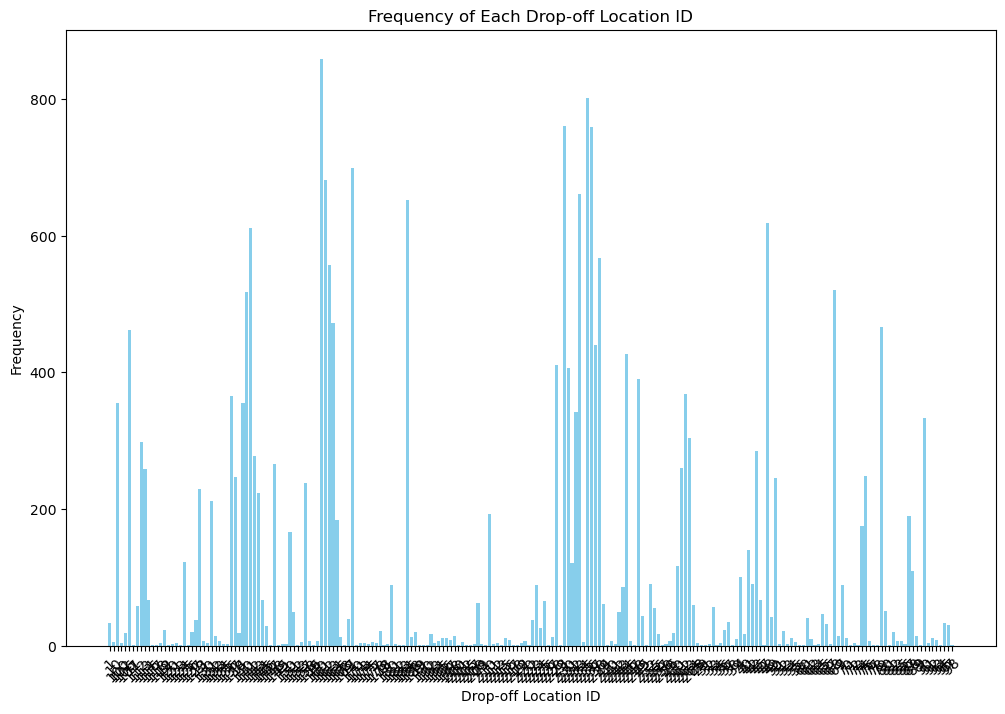

In [161]:
location_counts = df['DOLocationID'].value_counts()
location_counts = location_counts.sort_index()

plt.figure(figsize=(12, 8))
plt.bar(location_counts.index, location_counts.values, color='skyblue')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Frequency')
plt.title('Frequency of Each Drop-off Location ID')
plt.xticks(rotation=45) 
plt.show()

EDA is important because it:
1. Shows how data is distributed and reveals patterns.
2. Detects missing values and outliers.
3. Uses visuals to explain findings clearly.

Visualizations helped me understand

1.How data values are spread out.
2.Illustrated connections between different variables.
3.Identified outliers and unusual data points.